In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Load the dataset
file_path = 'C:/Users/UJJAWAL/OneDrive/Desktop/Assignments/Assignments/creditcard.csv'
data = pd.read_csv(file_path)

In [6]:
# Data Summary
data_summary = {
    "Shape of the dataset": data.shape,
    "First few rows": data.head(),
    "Data types": data.dtypes,
    "Missing values": data.isnull().sum()
}

print(data_summary)

{'Shape of the dataset': (284807, 31), 'First few rows':    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458

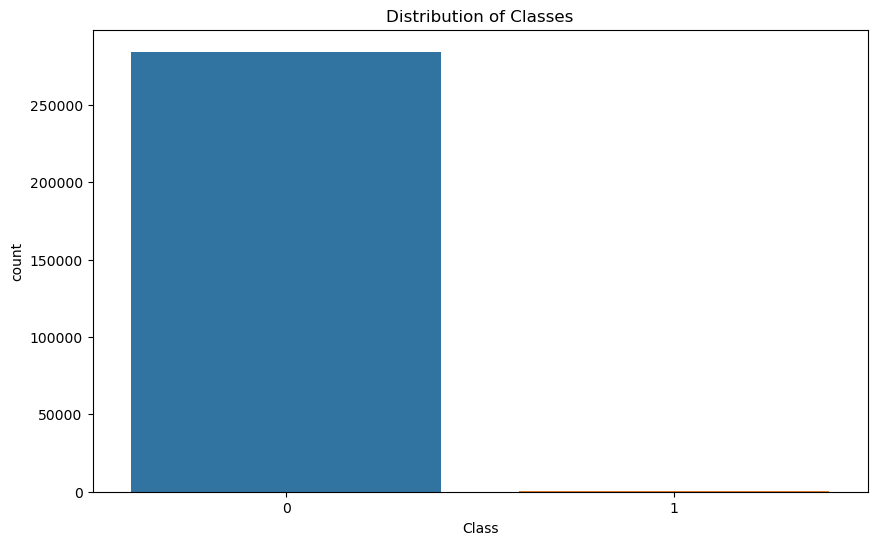

In [7]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.show()

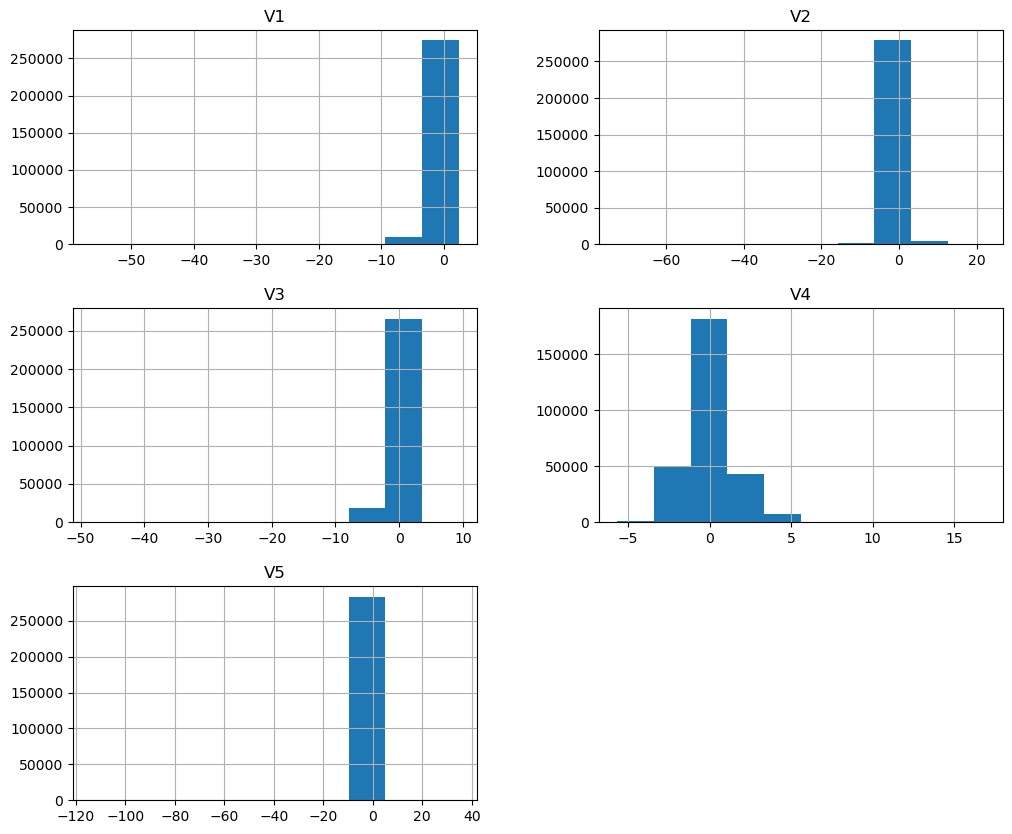

In [8]:
# Plotting the distribution of a few selected features
features = ['V1', 'V2', 'V3', 'V4', 'V5']
data[features].hist(figsize=(12, 10))
plt.show()

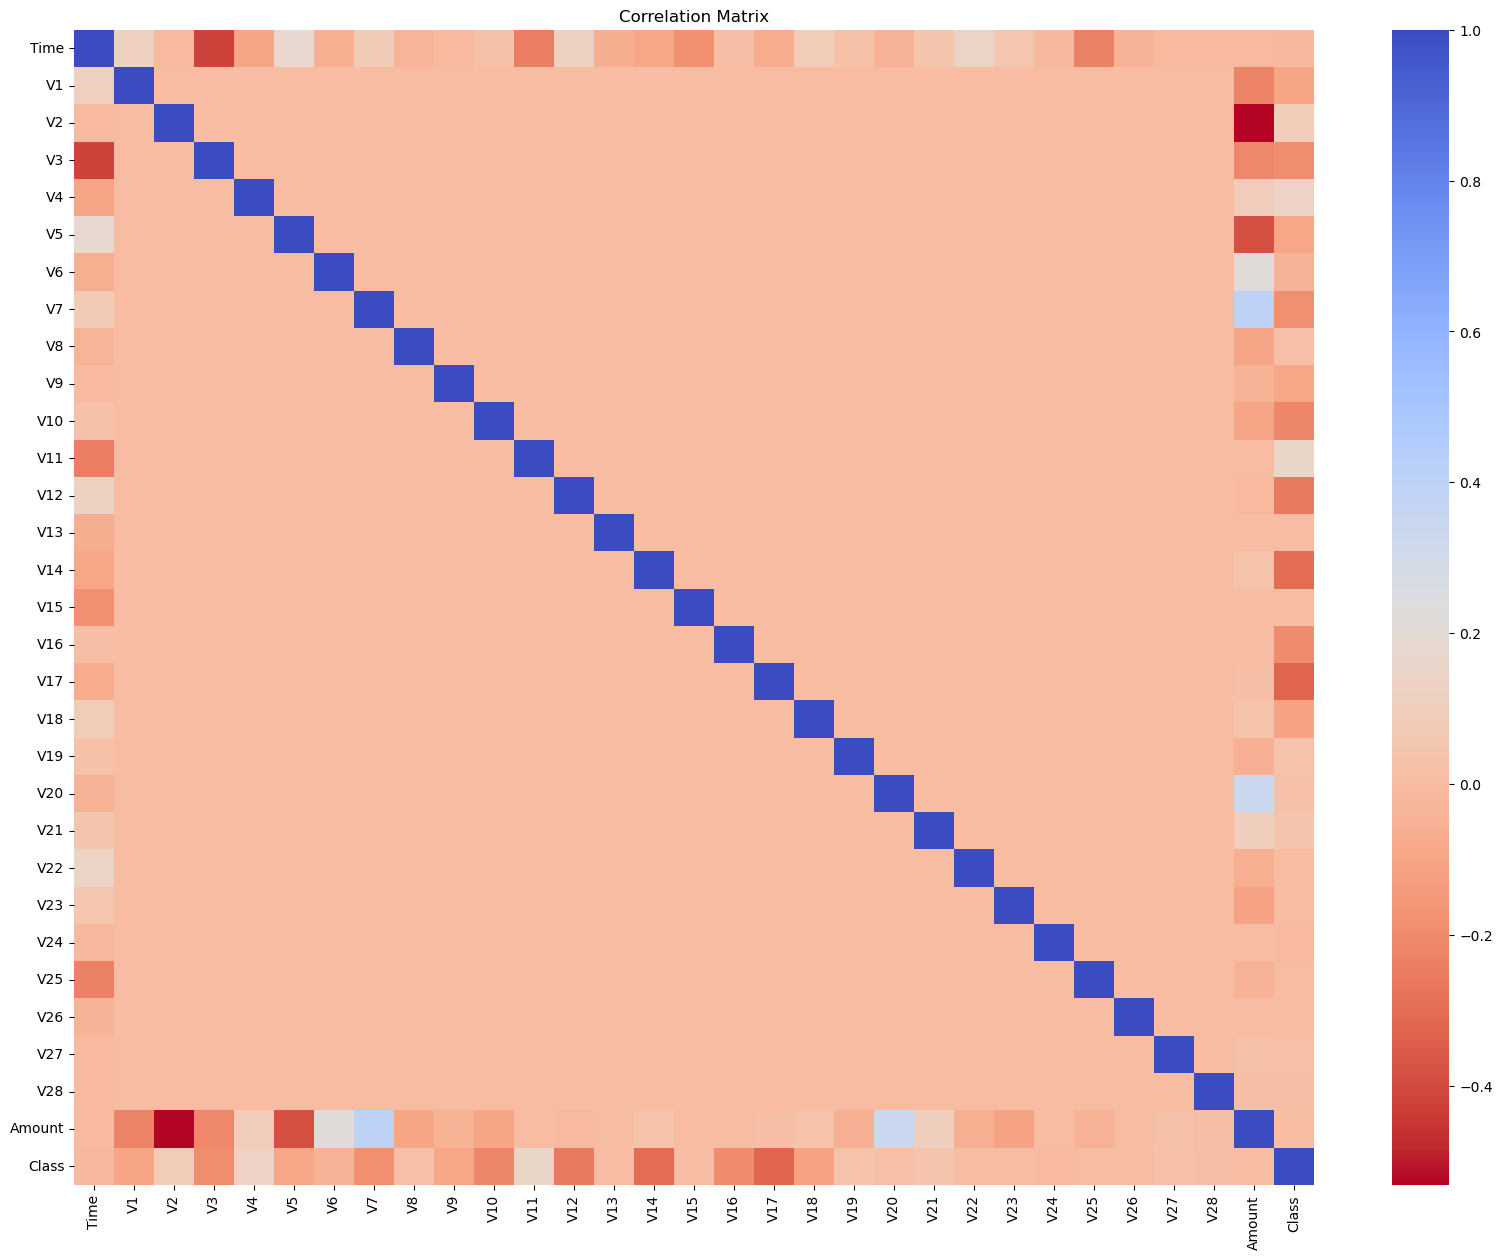

In [9]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), cmap="coolwarm_r", annot_kws={'size': 20})
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Preprocessing: Handling missing values and scaling features
# No missing values found in the initial check, so we move to scaling

# Separate the features and the target
X = data.drop(columns=['Class'])
y = data['Class']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Model Training and Evaluation
model_results = {}
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [13]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    model_results[model_name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Accuracy": accuracy_score(y_test, y_pred)
    }

In [14]:
data_summary, model_results

({'Shape of the dataset': (284807, 31),
  'First few rows':    Time        V1        V2        V3        V4        V5        V6        V7  \
  0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
  1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
  2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
  3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
  4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
  
           V8        V9  ...       V21       V22       V23       V24       V25  \
  0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
  1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
  2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
  3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
  4 -0.270533  0.817739  ... -0